   # VIOLÊNCIA DOMÉSTICA NO ESTADO DE PERNAMBUCO

### IMPORTANDO AS BIBLIOTECAS

In [1]:
#pip install openpyxl

Necessário instalar esse recurso para ler arquivos no formato .xlsx, o formato dos dados escolhidos para o projeto

In [2]:
#pip install pandas

In [3]:
import pandas as pd

Instalando e importante a biblioteca pandas que servirá como base para manipulação dos dados, ou seja, a biblioteca será utilizada para realização da limpeza, pré-processamento e engenharia de atributos, alem de auxiliar na analise exploratória e criação de gráficos simples.

## LENDO O ARQUIVO EXCEL

In [4]:
df = pd.read_excel(r'C:\Users\Ingrid Freire\Desktop\Projeto P1\MICRODADOS_DE_VIOLÊNCIA_DOMÉSTICA_JAN_2015_A_AGO_2022.xlsx')

In [5]:
df

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS
0,AFOGADOS DA INGAZEIRA,SERTÃO,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,6) 35-64,1
1,AFRANIO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,5) 30-34,1
2,AFRANIO,SERTÃO,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,4) 25-29,1
3,AGUAS BELAS,AGRESTE,ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...,2015-01-01,2015,FEMININO,2) 12-17,1
4,ALAGOINHA,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,6) 35-64,1
...,...,...,...,...,...,...,...,...
253698,SAO JOSE DO BELMONTE,SERTÃO,MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,(vazio),1
253699,SAO JOSE DO EGITO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,3) 18-24,1
253700,SURUBIM,AGRESTE,PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA...,2022-08-31,2022,FEMININO,6) 35-64,1
253701,VERDEJANTE,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,6) 35-64,1


A leitura do arquivo foi feita utilizando a função read_excel, disponivel na biblioteca pandas

#### VERIFICAÇÃO DOS TIPOS COLUNÁRES

In [6]:
df.dtypes

MUNICÍPIO DO FATO              object
REGIAO GEOGRÁFICA              object
NATUREZA                       object
DATA DO FATO           datetime64[ns]
ANO                             int64
SEXO                           object
IDADE SENASP                   object
TOTAL DE ENVOLVIDOS             int64
dtype: object

A feature "DATA DO FATO" ja está em datetime e os dados númericos estão como int64, não sendo necessário ajustes, vale salientar que a feature de idade é uma feature categórica, pois encontra-se dividida em intervalos de idade. As demais features encontram-se como object podendo ser mudadas para categórica a depender do objetivo do estudo, para nosso caso optamos por manter como object.

### ANALISE DOS VALORES COLUNARES

In [7]:
df['IDADE SENASP'].value_counts()

6) 35-64         92515
3) 18-24         48331
4) 25-29         41295
5) 30-34         41077
2) 12-17         11919
7) 65 OU MAIS     9693
1) 00-11          5959
(vazio)           2914
Name: IDADE SENASP, dtype: int64

Necessário fazer ajustes na strig. Por opção a equipe escolheu deixar os intervalos fechados no modelo XX-YY, onde XX é a idade inicial do intervalo e YY a idade final. Os ajustes seram realizados mais a frente

Como aparece dados com a string (vazio) vamos trocar a string para não informado

In [8]:
df['MUNICÍPIO DO FATO'].value_counts()

RECIFE                     42592
JABOATAO DOS GUARARAPES    15161
CARUARU                    13802
OLINDA                     13428
PETROLINA                  12257
                           ...  
GRANITO                      101
QUIXABA                       99
INGAZEIRA                     97
MARAIAL                       91
ITACURUBA                     82
Name: MUNICÍPIO DO FATO, Length: 185, dtype: int64

As cetegorias mostram-se já pré-processadas, não sendo necessário ajustes

In [9]:
df['NATUREZA'].value_counts()

AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    92689
LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR            63960
INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                   33233
OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             12914
DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                      12490
VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             12487
PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     8966
DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  6724
MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                3281
ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      2792
CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    1397
CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     1019
ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     975
PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                 586
CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             190
Name: NATUREZA, dtype: in

As cetegorias mostram-se já pré-processadas, não sendo necessário ajustes

In [10]:
df['SEXO'].value_counts()

FEMININO         236810
MASCULINO         16113
DESCONHECIDO        610
NAO INFORMADO       170
Name: SEXO, dtype: int64

Para a feature "SEXO" optou-se por juntar as categorias desconhecido e não informado, apesar de apresentarem poucas instâncias entende-se que essas pessoas podem ser não binárias e esta pode ser a causa da agressão. 

### Verificando existencia de dados faltantes

In [11]:
df.isnull().count()

MUNICÍPIO DO FATO      253703
REGIAO GEOGRÁFICA      253703
NATUREZA               253703
DATA DO FATO           253703
ANO                    253703
SEXO                   253703
IDADE SENASP           253703
TOTAL DE ENVOLVIDOS    253703
dtype: int64

Não há dados faltantes

### Engenharia de Features

#### Crianção de uma função para ajustar os dados do sexo

In [12]:
def ajuste_sexo (sexo):
    if sexo == 'DESCONHECIDO' or sexo == 'NAO INFORMADO':
        sexo = 'DESCONHECIDO/NAO INFORMADO'
    else:
        sexo = sexo

    return sexo

In [13]:
df['SEXO'] = df['SEXO'].apply(ajuste_sexo)

In [14]:
df['SEXO'].value_counts()

FEMININO                      236810
MASCULINO                      16113
DESCONHECIDO/NAO INFORMADO       780
Name: SEXO, dtype: int64

A aplicação dessas função foi feita com o uso do metodo apply, que aplica a função para cada uma das instâncias do dataframe

#### criação de uma funçao para ajustar a idade

In [15]:
def ajuste_idades(idade):
        if idade == '(vazio)':
                idade = 'Não informado'
        else:
                idade = idade[3:]
                
        return idade

In [16]:
df['IDADE SENASP'] = df['IDADE SENASP'].apply(ajuste_idades)

In [17]:
df['IDADE SENASP'].value_counts()

35-64            92515
18-24            48331
25-29            41295
30-34            41077
12-17            11919
65 OU MAIS        9693
00-11             5959
Não informado     2914
Name: IDADE SENASP, dtype: int64

#### Criação uma nova coluna com a informação do mês de ocorrência do fato

A equipe decidiu criar uma feature com as informações do mês de ocorrência do fato para analisar a sazonalidade dos mesmo, para tanto foi extraida, com o auxílio do método .month, da feature "DATA DO FATO" a informação referente ao mês de ocorrência do fato.

In [18]:
df['MÊS DO FATO'] = df['DATA DO FATO'].dt.month

In [19]:
df['MÊS DO FATO']

0         1
1         1
2         1
3         1
4         1
         ..
253698    8
253699    8
253700    8
253701    8
253702    8
Name: MÊS DO FATO, Length: 253703, dtype: int64

## Análise exploratória

#### Utilização de filtros para análise

Nesta etapa foram criadas alguns filtros a fim de realizar um estudo um pouco mais aprofundado sobre o compartamento dos dados, para tanto foram escolhidos alguns atributos como base para as pesquisas.

In [20]:
df[ df['MUNICÍPIO DO FATO'] == 'CARUARU' ]

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS,MÊS DO FATO
21,CARUARU,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,35-64,1,1
22,CARUARU,AGRESTE,ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...,2015-01-01,2015,FEMININO,18-24,1,1
23,CARUARU,AGRESTE,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,18-24,1,1
24,CARUARU,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,18-24,1,1
25,CARUARU,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,30-34,1,1
...,...,...,...,...,...,...,...,...,...
253537,CARUARU,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-30,2022,FEMININO,18-24,1,8
253538,CARUARU,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-30,2022,FEMININO,30-34,1,8
253635,CARUARU,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,18-24,1,8
253636,CARUARU,AGRESTE,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,18-24,1,8


In [21]:
df[ df['MUNICÍPIO DO FATO'] == 'CARUARU' ]['IDADE SENASP'].value_counts()

35-64            4813
18-24            2722
30-34            2563
25-29            2377
12-17             594
65 OU MAIS        378
00-11             287
Não informado      68
Name: IDADE SENASP, dtype: int64

In [22]:
df[ df['MUNICÍPIO DO FATO'] == 'CARUARU' ]['ANO'].value_counts()

2018    2119
2019    1973
2020    1843
2017    1829
2021    1754
2016    1573
2015    1531
2022    1180
Name: ANO, dtype: int64

In [23]:
df[ (df['SEXO'] == 'FEMININO') ]['IDADE SENASP'].value_counts()

35-64            86982
18-24            46158
25-29            39575
30-34            39403
12-17            10410
65 OU MAIS        8328
00-11             3972
Não informado     1982
Name: IDADE SENASP, dtype: int64

In [24]:
df[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '18-24') ]['NATUREZA'].value_counts()

AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    16907
LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR            14308
INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    5430
VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              2727
OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              2027
DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                       2007
DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  1010
PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      972
ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     191
CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     150
CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      125
MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  97
ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR        91
PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  88
CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              28
Name: NATUREZA, dtype: in

#### Verificando as idades das vítimas em alguns meses

In [25]:
df[df['MÊS DO FATO'] == 1]['IDADE SENASP'].value_counts()

35-64            8673
18-24            4176
30-34            3827
25-29            3677
65 OU MAIS        932
12-17             894
00-11             471
Não informado     279
Name: IDADE SENASP, dtype: int64

In [26]:
df[df['MÊS DO FATO'] == 2]['IDADE SENASP'].value_counts()

35-64            7558
18-24            3853
30-34            3455
25-29            3410
12-17             872
65 OU MAIS        833
00-11             482
Não informado     240
Name: IDADE SENASP, dtype: int64

In [27]:
df[df['MÊS DO FATO'] == 3]['IDADE SENASP'].value_counts()

35-64            8355
18-24            4284
30-34            3849
25-29            3754
12-17            1022
65 OU MAIS        925
00-11             530
Não informado     272
Name: IDADE SENASP, dtype: int64

#### Verificando a média de vítimas por fato

aqui utilizamos o método len para contar o numero de features de determinado dataframe

In [28]:
M = (df['TOTAL DE ENVOLVIDOS'].sum())/ (len(df))
M

1.207076778753109

Entendendo que a média de vítimas é bem próximo a 1, resolve-se estudar um pouco mais sobre os casos com mais de uma vítima para entede-los

In [29]:
df['TOTAL DE ENVOLVIDOS'].value_counts()

1     220954
2      22500
3       5664
4       2266
5       1075
6        560
7        309
8        189
9        106
10        45
11        22
12         4
13         4
14         3
16         1
15         1
Name: TOTAL DE ENVOLVIDOS, dtype: int64

In [30]:
(len(df[df['TOTAL DE ENVOLVIDOS'] > 1])/len(df)) * 100

12.908400767826947

Quase 13% dos acidentes envolvem mais de 1 vítima

In [31]:
df[df['TOTAL DE ENVOLVIDOS'] > 1]['NATUREZA'].value_counts()

AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    15628
LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             6933
INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    6275
VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              1083
PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      797
DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                        549
OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR               522
DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                   349
MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                 295
ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR       197
CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                      40
PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  39
CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR       18
ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                      14
CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              10
Name: NATUREZA, dtype: in

#### Algumas análises gráficas iniciais

<AxesSubplot: >

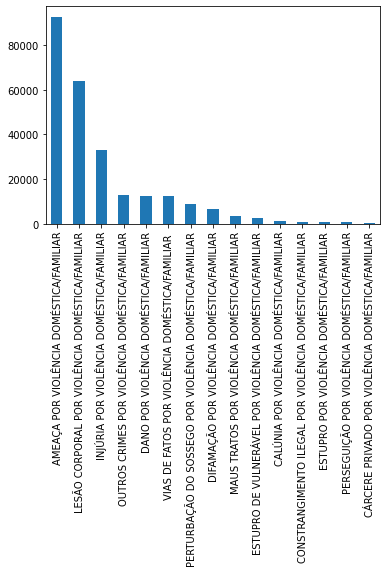

In [32]:
df['NATUREZA'].value_counts().plot.bar()

<AxesSubplot: >

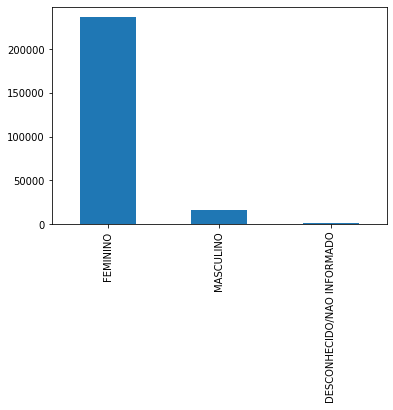

In [33]:
df['SEXO'].value_counts().plot.bar()

## Criação de um dataset para analise temporal

In [34]:
df_temp = df['DATA DO FATO'].value_counts().rename_axis('data').to_frame('N_casos')

In [35]:
df_temp.sort_index(inplace = True)

In [36]:
df_temp

,N_casos
data,
2015-01-01,102
2015-01-02,53
2015-01-03,87
2015-01-04,107
2015-01-05,88
...,...
2022-08-27,94
2022-08-28,174
2022-08-29,110


<AxesSubplot: xlabel='data'>

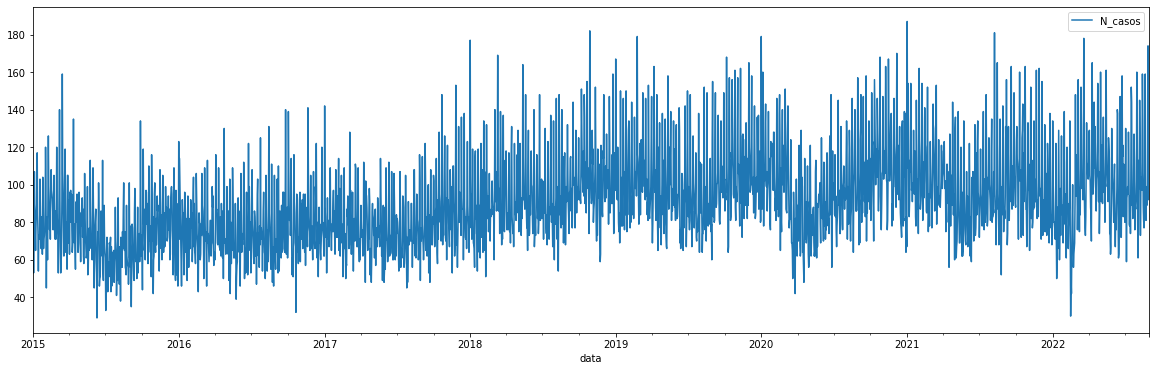

In [37]:
df_temp.plot(figsize=(20,6))

In [39]:
pip install statsmodels


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 9.1/9.1 MB 333.6 kB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 kB 207.2 kB/s eta 0:00:00
     -------------------------------------- 40.1/40.1 MB 390.0 kB/s eta 0:00:00


In [40]:
import statsmodels.tsa.api as tsa

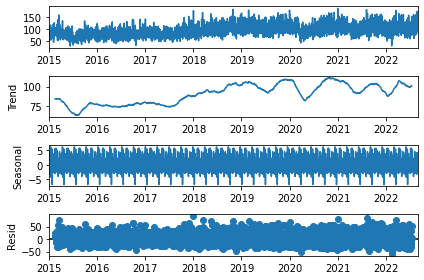

In [41]:
df_decomp = tsa.seasonal_decompose(df_temp, period = 90)
df_decomp.plot();

## Análise dos casos da região Metropolitana

In [42]:
df_metropolitana= df[ df['REGIAO GEOGRÁFICA'] == 'REGIÃO METROPOLITANA' ]
df_metropolitana

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS,MÊS DO FATO
12,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,18-24,1,1
13,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,30-34,1,1
14,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,18-24,1,1
15,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,30-34,1,1
16,CABO DE SANTO AGOSTINHO,REGIÃO METROPOLITANA,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015-01-01,2015,FEMININO,35-64,1,1
...,...,...,...,...,...,...,...,...,...
253670,OLINDA,REGIÃO METROPOLITANA,OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,35-64,1,8
253674,PAULISTA,REGIÃO METROPOLITANA,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,35-64,1,8
253675,PAULISTA,REGIÃO METROPOLITANA,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,MASCULINO,35-64,1,8
253676,PAULISTA,REGIÃO METROPOLITANA,MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2022-08-31,2022,FEMININO,00-11,1,8


In [43]:
df_metropolitana['MUNICÍPIO DO FATO'].value_counts()

JABOATAO DOS GUARARAPES    15161
OLINDA                     13428
PAULISTA                   11997
CABO DE SANTO AGOSTINHO     6288
CAMARAGIBE                  4590
SAO LOURENCO DA MATA        3298
IGARASSU                    3252
ABREU E LIMA                3020
IPOJUCA                     2707
MORENO                      1189
ITAMARACA                   1166
ITAPISSUMA                   636
ARACOIABA                    385
FERNANDO DE NORONHA          169
Name: MUNICÍPIO DO FATO, dtype: int64

In [44]:
df_metropolitana['IDADE SENASP'].value_counts()

35-64            26052
18-24            12158
25-29            10933
30-34            10917
12-17             2598
65 OU MAIS        2284
00-11             1681
Não informado      663
Name: IDADE SENASP, dtype: int64

In [45]:
df_metropolitana['SEXO'].value_counts()

FEMININO                      63305
MASCULINO                      3825
DESCONHECIDO/NAO INFORMADO      156
Name: SEXO, dtype: int64

In [46]:
df_metropolitana['NATUREZA'].value_counts()

AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    24470
LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR            15001
INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                   10228
OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              4201
DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                       2935
VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              2719
DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                  2568
PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     1869
MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                1044
ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR       867
CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     470
CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR      393
ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     312
PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                 152
CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              57
Name: NATUREZA, dtype: in

In [47]:
df_metropolitana['TOTAL DE ENVOLVIDOS'].value_counts()

1     59219
2      6494
3      1215
4       275
5        67
6        11
7         3
12        1
8         1
Name: TOTAL DE ENVOLVIDOS, dtype: int64

In [48]:
df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') & (df['TOTAL DE ENVOLVIDOS'] == 1) ]['NATUREZA'].value_counts()

C:\Users\Ingrid Freire\AppData\Local\Temp\ipykernel_9888\1786257456.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') & (df['TOTAL DE ENVOLVIDOS'] == 1) ]['NATUREZA'].value_counts()


AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    6342
LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR            3753
INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                   3700
OUTROS CRIMES POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             1660
DANO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                      1151
DIFAMAÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                 1090
VIAS DE FATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR              948
PERTURBAÇÃO DO SOSSEGO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     804
CALÚNIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                    237
CONSTRANGIMENTO ILEGAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR     182
MAUS TRATOS POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                 82
ESTUPRO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                     78
PERSEGUIÇÃO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR                 60
ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR       18
CÁRCERE PRIVADO POR VIOLÊNCIA DOMÉSTICA/FAMILIAR             14
Name: NATUREZA, dtype: int64

In [49]:
df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR') ]['ANO'].value_counts()

C:\Users\Ingrid Freire\AppData\Local\Temp\ipykernel_9888\3932453554.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR') ]['ANO'].value_counts()


2021    916
2019    883
2018    877
2020    854
2015    772
2016    752
2017    747
2022    541
Name: ANO, dtype: int64

C:\Users\Ingrid Freire\AppData\Local\Temp\ipykernel_9888\406591139.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR') ]['ANO'].value_counts().sort_index().plot.bar()


<AxesSubplot: >

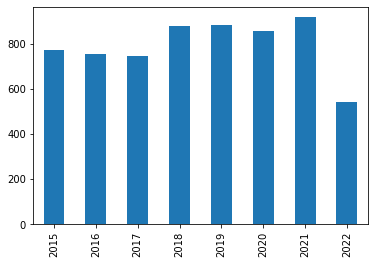

In [50]:
df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR') ]['ANO'].value_counts().sort_index().plot.bar()

In [51]:
df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR') & (df['ANO'] == 2021) ]['MÊS DO FATO'].value_counts()

C:\Users\Ingrid Freire\AppData\Local\Temp\ipykernel_9888\4101755010.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR') & (df['ANO'] == 2021) ]['MÊS DO FATO'].value_counts()


9     86
10    84
4     80
8     80
11    79
3     78
5     76
1     75
12    75
6     72
7     67
2     64
Name: MÊS DO FATO, dtype: int64

C:\Users\Ingrid Freire\AppData\Local\Temp\ipykernel_9888\2535320207.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR') & (df['ANO'] == 2021) ]['MÊS DO FATO'].value_counts().sort_index().plot.bar()


<AxesSubplot: >

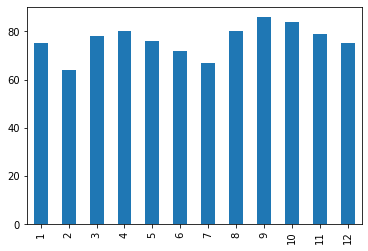

In [52]:
df_metropolitana[ (df['SEXO'] == 'FEMININO') & (df['IDADE SENASP'] == '35-64') &  (df['TOTAL DE ENVOLVIDOS'] == 1) & (df['NATUREZA'] =='AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR') & (df['ANO'] == 2021) ]['MÊS DO FATO'].value_counts().sort_index().plot.bar()